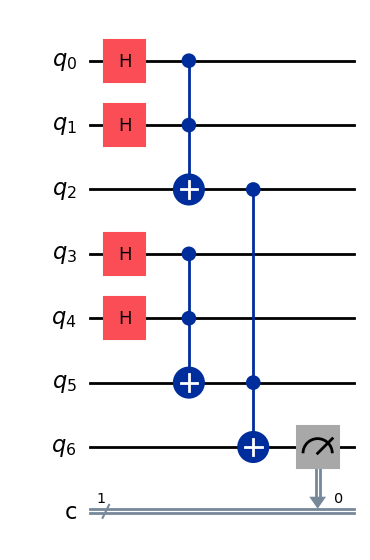

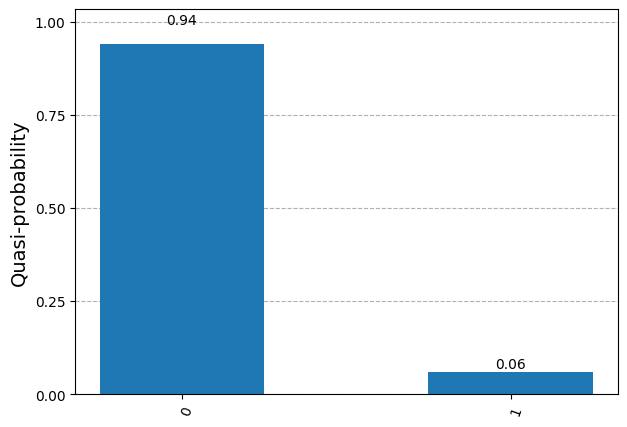

In [5]:
# quantum_circuit3.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

# Cell 1: construct a quantum circuit with 3 quantum bits and 1 classical bit

qc = QuantumCircuit(7, 1)  # quantum circuit with 7 qubits and one classical bit
qc.h(0)  # hadamard gates applied on q0, q1, q3, and q4
qc.h(1)
qc.h(3)
qc.h(4)
qc.ccx(0, 1, 2)  # CNOT gate
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)

qc.measure(6, 0)


display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=1024).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# cell 2
"""If there was no quantum noise, there would be a 1/16 chance that q6 was a 1. This is because after the 
Hadamard gates are applied to q0, q1, q3, and q4 then each of these qubits are in a superposition with an
equal probability of measuring as a 0 or a 1. When the CCNOT gates are applied to q0, q1, q2 and q3, q4, and 
q5, there is a 1/4 chance that q0 and q1 are both 1s and therefore a 1 in 4 chance that q2 becomes a 1. Similarly
there is a 1/4 chance that q5 becomes a 1. Finally, when the CCNOT gate is applied to q2, q5, and q6, there is a
1/4 chance that q2 is a 1 and a 1/4 chance that q5 is a 1. This means there is a 1/16 chance that they are both
1s and therefore a 1/16 chance that the not gate is activated and q6 becomes a 1."""